<a href="https://colab.research.google.com/github/Enna2023/test-colab/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
#import libraries
import pandas as pd
import seaborn as sns

# Download dataset from Kaggle

In [2]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = 'elapid'
os.environ['KAGGLE_KEY'] = '241bfa1dac6337a0bf41226eded3a67a'

In [3]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 55.7MB/s]


In [4]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [5]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [6]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#count of rows and columns
df.shape

(569, 33)

In [9]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
# Drop the column with null values
df.dropna(axis = 1, inplace = True)

In [11]:
# count of rows and columns
df.shape

(569, 32)

In [12]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [13]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [17]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)
# df.iloc[:,1].values

<ipython-input-17-328238cd4c3f>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)


In [18]:
#display df
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Dataset & Feature Scaling

In [20]:
#Splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [21]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [24]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
#print data
X_train

array([[ 1.30586472,  0.65493201,  1.24995619, ...,  0.42363093,
         0.33315299, -0.39638885],
       [ 1.88797883,  0.62438077,  1.82948273, ...,  1.02856209,
        -0.47098076, -0.87640401],
       [ 4.13160456, -0.15350098,  4.16037254, ...,  0.76214163,
        -2.01652582, -1.54019639],
       ...,
       [-0.83537913,  0.7794871 , -0.82568627, ..., -0.73247714,
         0.42964904, -0.1648844 ],
       [-0.56333586, -0.05244686, -0.60538097, ..., -0.93934479,
        -0.03514027, -0.13690637],
       [-0.79442638, -0.85147947, -0.74514913, ..., -0.44113853,
        -1.19791767,  1.15063142]])

# Build a Logistic Regression Model

In [29]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [30]:
#make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)

# Performance Evaluation

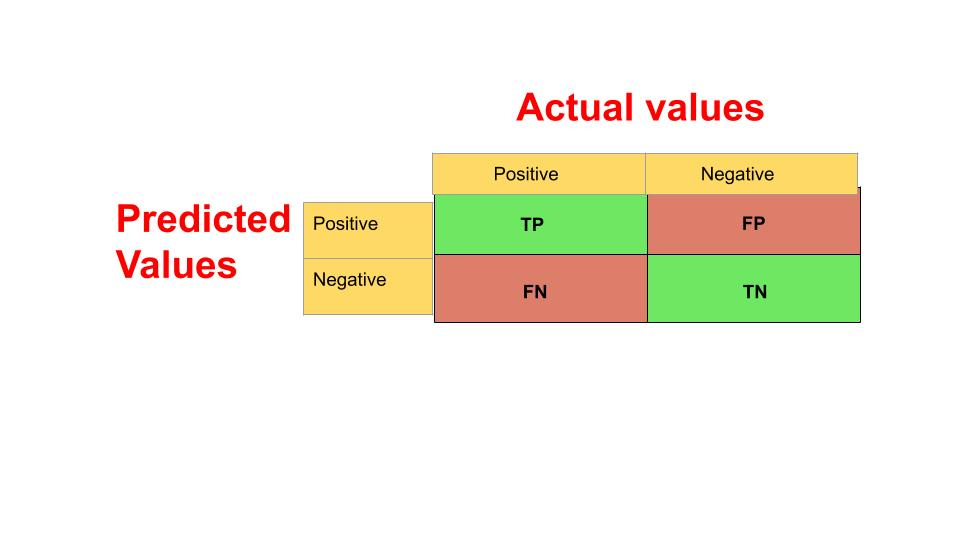

[[84  0]
 [ 8 51]]


<Axes: >

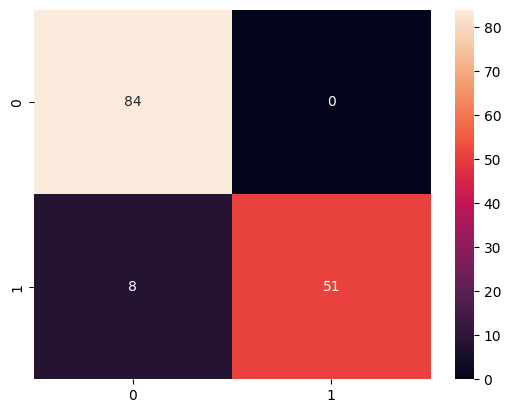

In [31]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [32]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.9440559440559441


In [33]:
print(Y_test)

[0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]


In [34]:
print(predictions)

[0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
